In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
pd.options.display.max_columns=1000
sns.set_theme()

In [3]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [4]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [5]:
df.shape

(919288, 20)

In [6]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [7]:
target_names = 'set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [8]:
model = LogisticRegression()

In [9]:
fn_over = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)

In [10]:
X = df[fn_over]
y = df['is_ninjago']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

In [12]:
df_train = pd.concat([pd.DataFrame(X_train, columns=fn_over), pd.DataFrame(y_train, columns=['is_ninjago'])], axis=1)

In [13]:
df_test = pd.concat([pd.DataFrame(X_test, columns=fn_over), pd.DataFrame(y_test, columns=['is_ninjago'])], axis=1)

In [14]:
print(df_train.shape)
print(df_test.shape)

(827359, 11)
(91929, 11)


In [15]:
df_grouped_train = df_train.groupby('is_ninjago')

df_grouped_train.head()

,year,num_parts,set_num_len,set_name_len,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
774631,2014,368,7,19,15,1,0,11,5,59,0
417226,2013,284,7,16,0,1,0,5,5,45,0
414960,2010,631,6,20,0,1,0,5,5,57,0
896798,2008,842,6,33,0,2,0,4,5,12,0
591153,2007,974,6,19,70,3,0,6,13,53,0
555268,2016,754,7,17,2,3,0,4,5,11,1
575778,2015,361,7,15,19,1,0,5,3,27,1
576490,2015,2030,7,18,0,1,0,6,5,54,1
612760,2020,1017,7,23,27,8,0,4,4,33,1
567503,2019,364,7,11,0,2,0,5,5,43,1


In [16]:
print(df_grouped_train.size())

is_ninjago
0    795565
1     31794
dtype: int64


In [17]:
list(df_grouped_train)[0][1]

lengths = []

for is_ninjago, group in df_grouped_train:
    lengths.append(group.shape[0])
    
print(lengths)

[795565, 31794]


In [18]:
dfs_train = list()

for is_ninjago, group in df_grouped_train:
    dfs_train.append(group.sample(max(lengths), replace=True))
    
dfs_train

[        year  num_parts  set_num_len  set_name_len  color_id  quantity  \
 79683   2000        450            6            31         2         1   
 466612  2007        604            6            13        15         4   
 526316  2013        505            7            24         0         1   
 201026  2012        305            6            24        40         1   
 269304  2017        402            7            18        14         2   
 ...      ...        ...          ...           ...       ...       ...   
 346171  2015        167            7            10        25         1   
 296133  2018        141            7             8        70         2   
 493822  1999         30            6            20         1         1   
 129391  2021       3955            7            10        47         2   
 668926  2019       1772            7            10        15         5   
 
         is_trans  part_num_len  color_name_len  part_name_len  is_ninjago  
 79683          0    

In [19]:
df_balancedbyover = pd.concat(dfs_train)
df_balancedbyover.head()

,year,num_parts,set_num_len,set_name_len,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
79683,2000,450,6,31,2,1,0,4,5,11,0
466612,2007,604,6,13,15,4,0,4,5,11,0
526316,2013,505,7,24,0,1,0,5,5,50,0
201026,2012,305,6,24,40,1,1,5,11,36,0
269304,2017,402,7,18,14,2,0,4,6,27,0


In [20]:
df_balancedbyover.shape

(1591130, 11)

In [21]:
hyper_table_df_grouped = list()
fn_over = list()
for i, name in tqdm(enumerate(df_balancedbyover.columns), total=len(df_balancedbyover.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)
    model.fit(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])

    s_train = model.score(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    s_test = model.score(df_test[fn_over], df_test['is_ninjago'])
    y_pred = model.predict(df_test[fn_over])

    conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)
    conf_matrix

    precision = precision_score(df_test['is_ninjago'], y_pred)
    recall = recall_score(df_test['is_ninjago'], y_pred)
    accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
    f1 = f1_score(df_test['is_ninjago'], y_pred)
    
    hyper_table_df_grouped.append(dict(sample='over', 
                         desc=str(fn_over), 
                         train_score=s_train, 
                         test_score=s_test, 
                         precision=precision,
                         recall=recall,
                         accuracy=accuracy,
                         f1_score=f1,
                         model=model, 
                         num_features=df_balancedbyover[fn_over].shape[1], 
                         num_rows_train=df_balancedbyover.shape[0],
                         num_rows_test=df_test.shape[0],
                         last_feature=fn_over[-1]))

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:04<00:10, 10.06s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
11it [01:19,  7.20s/it]                                                                                                


In [22]:
model_rf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)

In [23]:
fn_over = list()
for i, name in tqdm(enumerate(df_balancedbyover.columns), total=len(df_balancedbyover.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)
    model_rf.fit(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    
    s_train = model_rf.score(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    s_test = model_rf.score(df_test[fn_over], df_test['is_ninjago'])
    y_pred = model_rf.predict(df_test[fn_over])

    conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)
    conf_matrix

    precision = precision_score(df_test['is_ninjago'], y_pred)
    recall = recall_score(df_test['is_ninjago'], y_pred)
    accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
    f1 = f1_score(df_test['is_ninjago'], y_pred)
    
    hyper_table_df_grouped.append(dict(sample='over', 
                         desc=str(fn_over), 
                         train_score=s_train, 
                         test_score=s_test, 
                         precision=precision,
                         recall=recall,
                         accuracy=accuracy,
                         f1_score=f1,
                         model=model_rf, 
                         num_features=df_balancedbyover[fn_over].shape[1], 
                         num_rows_train=df_balancedbyover.shape[0],
                         num_rows_test=df_test.shape[0], 
                         last_feature=fn_over[-1]))

11it [13:05, 71.41s/it]                                                                                                


In [24]:
ht_dfg_over = pd.DataFrame(hyper_table_df_grouped).sort_values('test_score', ascending=False)
ht_dfg_over

,sample,desc,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
13,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999558,0.999064,0.977636,0.999456,0.999064,0.988425,"(DecisionTreeClassifier(max_features='auto', r...",4,1591130,91929,set_name_len
14,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999791,0.998956,0.985350,0.988568,0.998956,0.986957,"(DecisionTreeClassifier(max_features='auto', r...",5,1591130,91929,color_id
15,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999873,0.998521,0.986791,0.976048,0.998521,0.981390,"(DecisionTreeClassifier(max_features='auto', r...",6,1591130,91929,quantity
16,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999873,0.997944,0.984431,0.963800,0.997944,0.974006,"(DecisionTreeClassifier(max_features='auto', r...",7,1591130,91929,is_trans
18,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999920,0.997378,0.981757,0.952096,0.997378,0.966699,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,color_name_len
19,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999993,0.996367,0.985748,0.922428,0.996367,0.953037,"(DecisionTreeClassifier(max_features='auto', r...",10,1591130,91929,part_name_len
17,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999920,0.996008,0.971755,0.927055,0.996008,0.948879,"(DecisionTreeClassifier(max_features='auto', r...",8,1591130,91929,part_num_len
12,over,"['year', 'num_parts', 'set_num_len']",0.994841,0.989840,0.797438,0.999728,0.989840,0.887198,"(DecisionTreeClassifier(max_features='auto', r...",3,1591130,91929,set_num_len
11,over,"['year', 'num_parts']",0.992038,0.984194,0.716937,0.998911,0.984194,0.834755,"(DecisionTreeClassifier(max_features='auto', r...",2,1591130,91929,num_parts
1,over,"['year', 'num_parts']",0.546460,0.738255,0.056165,0.351116,0.738255,0.096840,LogisticRegression(),2,1591130,91929,num_parts


10


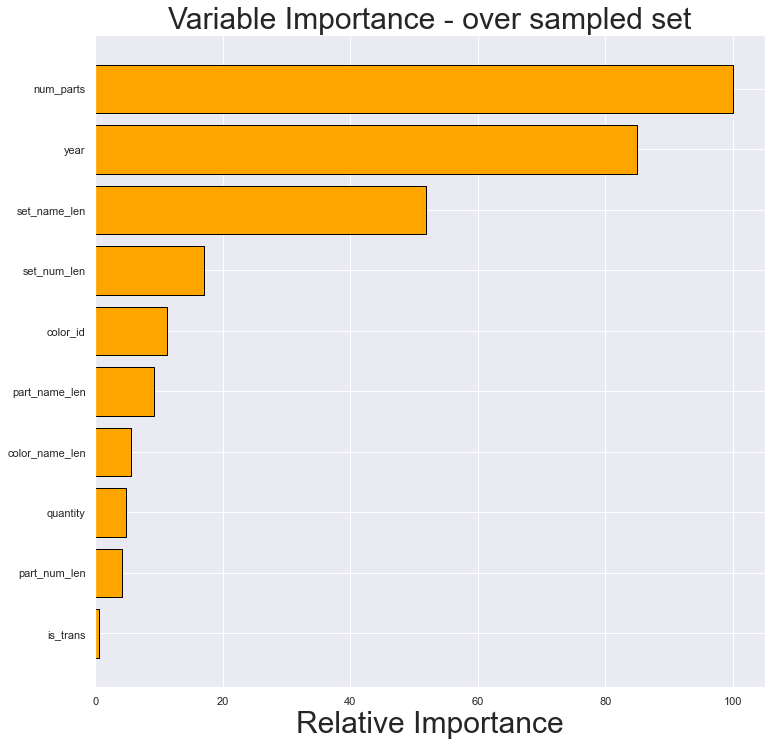

In [25]:
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_idx], color='orange', edgecolor='black', align='center')
plt.yticks(pos, df_balancedbyover[fn_over].columns[sorted_idx])
plt.xlabel('Relative Importance', fontsize=30)
plt.title('Variable Importance - over sampled set', fontsize=30)
plt.grid(True)
plt.show()

In [26]:
ht_dfg_over.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_dfg_over.csv', index=False)

In [27]:
hyper_table = list()

In [28]:
target_names = 'is_trans set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [29]:
model_rf = RandomForestClassifier(n_estimators=1, random_state = 1,n_jobs=-1)

model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_0 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_0,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0],
                    last_feature=fn[-1]))

In [30]:
target_names = 'part_num_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [31]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_1 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [32]:
target_names = 'set_num_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [33]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_2 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_2,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0],
                    last_feature=fn[-1]))

In [34]:
target_names = 'color_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [35]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_3 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_3,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [36]:
target_names = 'quantity set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [37]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_4 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_4,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [38]:
target_names = 'color_id set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [39]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_5 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_5,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [40]:
target_names = 'part_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [41]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_6 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_6,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [42]:
target_names = 'year set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [43]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_7 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_7,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [44]:
target_names = 'set_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [45]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_8 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_8,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [46]:
target_names = 'num_parts set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [47]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_9 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='over', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_9,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [48]:
ht = pd.DataFrame(hyper_table).sort_values('test_score', ascending=False)
ht

,sample,missing_feature,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
0,over,is_trans,0.999317,0.990253,0.853615,0.912629,0.990253,0.882136,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len
6,over,part_name_len,0.999243,0.990155,0.841430,0.928688,0.990155,0.882909,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,color_name_len
4,over,quantity,0.999261,0.989209,0.828999,0.919706,0.989209,0.872000,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len
5,over,color_id,0.999231,0.989133,0.831968,0.912357,0.989133,0.870310,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len
2,over,set_num_len,0.999028,0.986109,0.794110,0.880784,0.986109,0.835205,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len
1,over,part_num_len,0.999028,0.986098,0.794060,0.880512,0.986098,0.835054,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len
3,over,color_name_len,0.998927,0.985717,0.787017,0.881056,0.985717,0.831386,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len
7,over,year,0.997913,0.970814,0.607089,0.764562,0.970814,0.676786,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len
8,over,set_name_len,0.997164,0.961155,0.510465,0.683723,0.961155,0.584526,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len
9,over,num_parts,0.984088,0.931132,0.312332,0.601796,0.931132,0.411234,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len


In [49]:
ht['diff'] = ht['test_score'].diff()

In [50]:
ht.sort_values('diff')

,sample,missing_feature,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature,diff
9,over,num_parts,0.984088,0.931132,0.312332,0.601796,0.931132,0.411234,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,-0.030023
7,over,year,0.997913,0.970814,0.607089,0.764562,0.970814,0.676786,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,-0.014903
8,over,set_name_len,0.997164,0.961155,0.510465,0.683723,0.961155,0.584526,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,-0.009660
2,over,set_num_len,0.999028,0.986109,0.794110,0.880784,0.986109,0.835205,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,-0.003024
4,over,quantity,0.999261,0.989209,0.828999,0.919706,0.989209,0.872000,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,-0.000946
3,over,color_name_len,0.998927,0.985717,0.787017,0.881056,0.985717,0.831386,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,-0.000381
6,over,part_name_len,0.999243,0.990155,0.841430,0.928688,0.990155,0.882909,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,color_name_len,-0.000098
5,over,color_id,0.999231,0.989133,0.831968,0.912357,0.989133,0.870310,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,-0.000076
1,over,part_num_len,0.999028,0.986098,0.794060,0.880512,0.986098,0.835054,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,-0.000011
0,over,is_trans,0.999317,0.990253,0.853615,0.912629,0.990253,0.882136,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,91929,part_name_len,NaN


In [51]:
hyper_table = list()

In [52]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [53]:
target_names = 'year num_parts set_name_len'.split()

fn = list()

for i, name in enumerate(target_names):
    fn.append(name)
    
fn

['year', 'num_parts', 'set_name_len']

In [54]:
model_rf.fit(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])

s_train = model_rf.score(df_balancedbyover[fn], df_balancedbyover['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

In [55]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

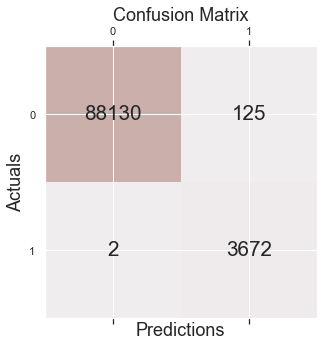

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [57]:
precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1 = f1_score(df_test['is_ninjago'], y_pred)

In [58]:
hyper_table.append(dict(sample='over', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyover.shape[0],
                    num_rows_test=df_test.shape[0])) 

In [59]:
ht_fr = pd.DataFrame(hyper_table)
ht_fr

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,over,0.999403,0.998618,0.967079,0.999456,0.998618,0.983001,"(DecisionTreeClassifier(max_features='auto', r...",3,1591130,91929


In [60]:
ht_fr.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_over.csv', index=False)